In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
aktia = pd.read_excel('Aktia.xlsx', skip_blank_lines=True).dropna()
nordea = pd.read_excel('Nordea.xlsx', skip_blank_lines=True).dropna()

#laitetaan indeksiin aikaleimat
aktia.index = pd.to_datetime(aktia['Päivämäärä'],dayfirst=True)
nordea.index = pd.to_datetime(nordea['Päivämäärä'],dayfirst=True)

#järjestetään indeksi vanhimmasta uusimpaan
aktia.sort_index(inplace = True)
nordea.sort_index(inplace = True)

nordea.head()

,Päivämäärä,Ylin,Alin,Päätöskurssi,Keskimäärin,Muutos %,Vaihto kpl,Vaihto €
Päivämäärä,,,,,,,,
2014-05-23 03:00:00,2014-05-23 03:00:00,10.66,10.57,10.66,10.608271,0.376648,418659,4441247.97
2014-05-26 03:00:00,2014-05-26 03:00:00,10.80,10.69,10.79,10.761295,1.219512,406951,4379341.59
2014-05-27 03:00:00,2014-05-27 03:00:00,10.88,10.73,10.84,10.825449,0.463392,542041,5867837.46
2014-05-28 03:00:00,2014-05-28 03:00:00,10.87,10.72,10.84,10.822609,0.000000,406228,4396390.85
2014-05-30 03:00:00,2014-05-30 03:00:00,10.89,10.80,10.81,10.841901,-0.276753,604910,6558374.57


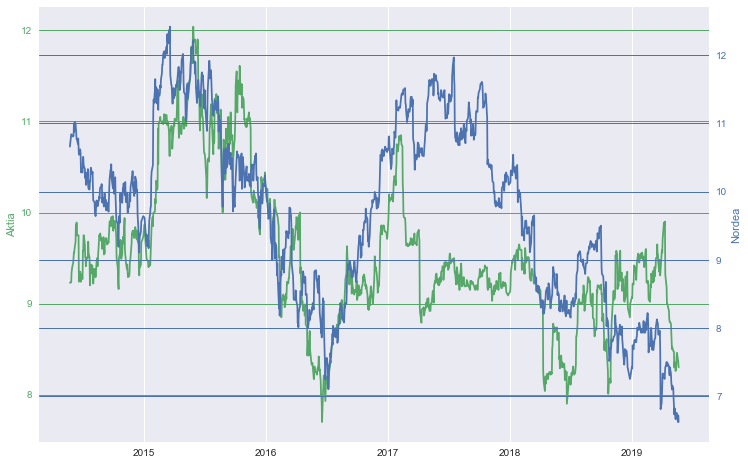

In [3]:
#vertaillaan Aktian ja Nordean kurrsikehitystä
#luodaan kuvio- ja axis-oliot
kuvio1, ax1 = plt.subplots(figsize=(12,8))

#määritetään ax1-olio
väri = 'C1'
ax1.set_ylabel('Aktia', color=väri)
ax1.plot(aktia['Päätöskurssi'], color=väri)
ax1.tick_params(axis='y', labelcolor=väri, grid_color=väri)

#luodaan ax2-olio
ax2 = ax1.twinx()

väri = 'C6'
ax2.set_ylabel('Nordea', color=väri)
ax2.plot(nordea['Päätöskurssi'], color=väri)
ax2.tick_params(axis='y', labelcolor=väri, grid_color=väri)

(0, 10)

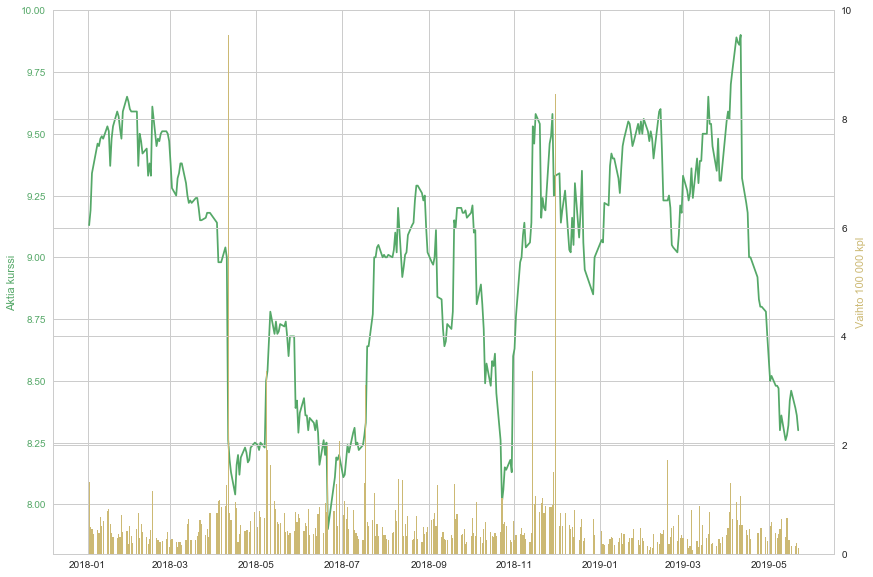

In [4]:
#Aktian kurssikehitys ja volyymi vuoden 2018 alusta
plt.style.use('seaborn-whitegrid')
kuvio2, ax3, = plt.subplots(figsize=(14,10))

väri = 'C1'
ax3.set_ylabel('Aktia kurssi', color=väri)
ax3.plot(aktia['2018-01':]['Päätöskurssi'], color=väri)
ax3.tick_params(axis='y', labelcolor=väri)

ax4 = ax3.twinx()

väri = 'C4'
ax4.set_ylabel('Vaihto 100 000 kpl', color=väri)
ax4.bar(aktia['2018-01':].index, aktia['2018-01':]['Vaihto kpl']/100000, color=väri)
ax4.set_ylim(0,10)

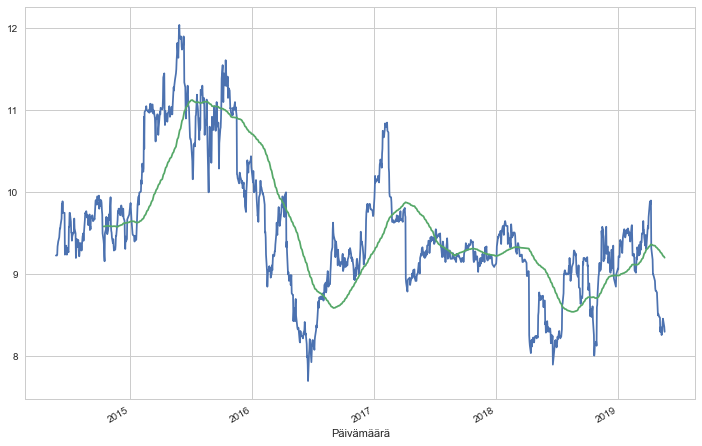

In [5]:
#Päätöskurssin liukuva keskiarvo
aktia['Päätöskurssi'].plot()
aktia['Päätöskurssi'].rolling(100).mean().plot(figsize = (12, 8))

[Text(0, 0, '-12 %'),
 Text(0, 0, '-10 %'),
 Text(0, 0, '-8 %'),
 Text(0, 0, '-6 %'),
 Text(0, 0, '-4 %'),
 Text(0, 0, '-2 %'),
 Text(0, 0, '0 %'),
 Text(0, 0, '2 %'),
 Text(0, 0, '4 %'),
 Text(0, 0, '6 %')]

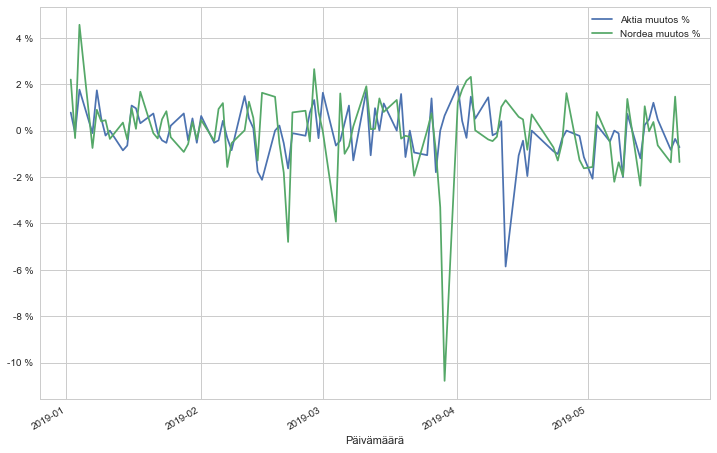

In [6]:
#Aktian ja Elisan kurssimuutokset
aktia.rename(columns={'Muutos %': 'Aktia muutos %'}, inplace=True)
nordea.rename(columns={'Muutos %': 'Nordea muutos %'}, inplace=True)

muutokset = pd.concat([aktia['Aktia muutos %'], nordea['Nordea muutos %']], axis=1)

ax5 = muutokset['2019-01':].plot(figsize=(12,8))
arvot = ax5.get_yticks()
ax5.set_yticklabels(['{:.0f} %'.format(y*1) for y in arvot])

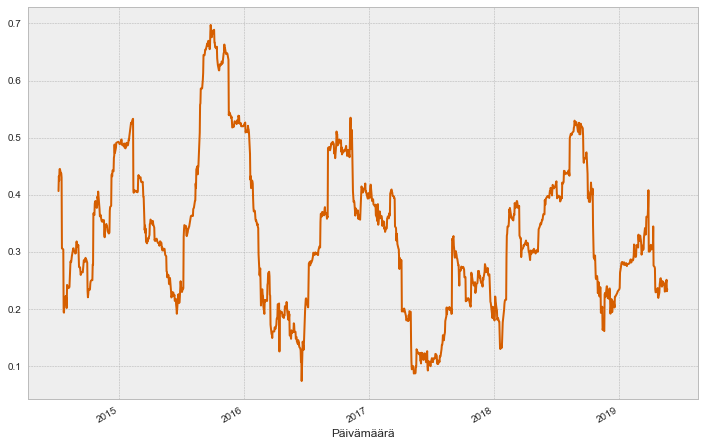

In [7]:
plt.style.use('bmh')

#Tutkitaan liukuvan korrelaation avulla miten Aktian ja Nordean osakkeet ovat korreloineet keskenään
korrelaatio = muutokset['Aktia muutos %'].rolling(100,min_periods=30).corr(muutokset['Nordea muutos %'])
korrelaatio.plot(figsize=(12,8), color='C4')

Text(0, 0.5, 'Volatiliteetti')

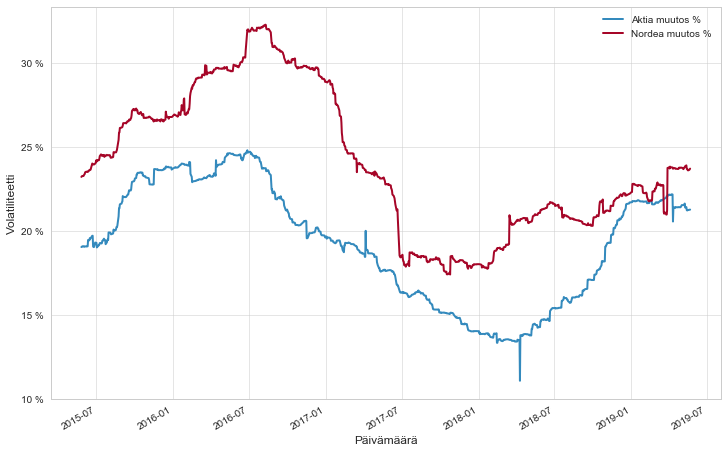

In [8]:
#Vertaillaan Aktian ja Nordean volatiliteettia viime vuosina
plt.style.use('seaborn-whitegrid')

akt_muut = (muutokset['Aktia muutos %'].rolling(252).std()*(252**0.5))
nord_muut = (muutokset['Nordea muutos %'].rolling(252).std()*(252**0.5))

muutokset1 = pd.concat([akt_muut, nord_muut], axis=1)

ax6 = muutokset1['2015-01':].plot(figsize=(12,8))
arvot = ax6.get_yticks()
ax6.set_yticklabels(['{:.0f} %'.format(y*1) for y in arvot])
ax6.set_ylabel('Volatiliteetti')

([<matplotlib.axis.XTick at 0x2ad8b4f42b0>,
 <a list of 5 Text xticklabel objects>)

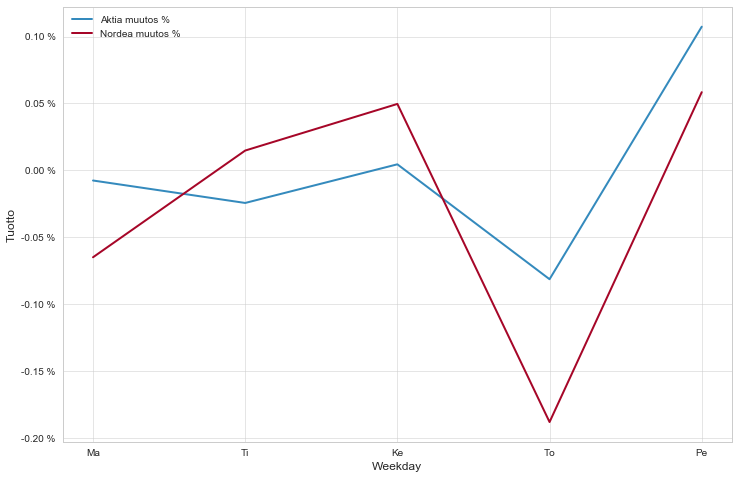

In [9]:
muutokset['Weekday'] = muutokset.index.weekday

akt_vkp = muutokset.groupby('Weekday')['Aktia muutos %'].mean()
nord_vkp = muutokset.groupby('Weekday')['Nordea muutos %'].mean()

tuotot = pd.concat([akt_vkp, nord_vkp], axis=1)

ax7 = tuotot.plot(figsize=(12,8))
arvot = ax7.get_yticks()
ax7.set_yticklabels(['{:.2f} %'.format(y*1) for y in arvot])
ax7.set_ylabel('Tuotto')

plt.xticks([0,1,2,3,4],['Ma','Ti','Ke','To','Pe'])